<a href="https://colab.research.google.com/github/SURESHASWATHI/Excelr_assignment/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Apply Decision Tree Classification to the dataset "drug200.csv", analyze the model's performance, interpret the results, and answer the provided interview questions.

## Load the dataset

### Subtask:
Load the dataset into a pandas DataFrame.


**Reasoning**:
The subtask requires loading a CSV file into a pandas DataFrame and displaying the first few rows. This can be achieved by importing pandas, reading the CSV, and using the head() method.



In [3]:
df = pd.read_excel('/content/heart_disease.xlsx')
display(df.head())

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


## Perform exploratory data analysis (eda)

### Subtask:
Analyze the data to understand its structure, check for missing values, outliers, and inconsistencies. Visualize the distribution of features.


**Reasoning**:
Get a concise summary of the DataFrame, generate descriptive statistics, calculate the number of unique values, and check for missing values to understand the data structure and quality.



In [4]:
df.info()
display(df.describe())
display(df.nunique())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


,0
age,12
Age in years,12


,0
age,0
Age in years,0


**Reasoning**:
The previous output shows that the current dataframe `df` contains metadata about the columns of the original dataset, not the dataset itself. The subtask requires analyzing and visualizing the actual data, which is likely in a sheet or a different file within the `/content/heart_disease.xlsx` workbook. I need to examine the available sheets in the Excel file to find the actual data.



In [5]:
excel_file = pd.ExcelFile('/content/heart_disease.xlsx')
display(excel_file.sheet_names)

['Description', 'Heart_disease']

**Reasoning**:
The sheet names indicate that 'Heart_disease' likely contains the actual data, while 'Description' contains the metadata that was loaded initially. I need to load the 'Heart_disease' sheet into a DataFrame to proceed with the data analysis and visualization steps outlined in the subtask.



In [6]:
df = pd.read_excel('/content/heart_disease.xlsx', sheet_name='Heart_disease')
df.info()
display(df.describe())
display(df.nunique())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


,0
age,49
sex,2
cp,4
trestbps,85
chol,228
fbs,2
restecg,3
thalch,122
exang,4
oldpeak,53


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


**Reasoning**:
The initial analysis revealed missing values in 'oldpeak' and potential inconsistencies in categorical columns like 'sex', 'cp', 'exang', 'slope', and 'thal' based on the unique values and data types. The 'exang' column also has 'TURE' and 'FALSE' values which need to be corrected to boolean. The 'thal' column has an unknown value '?'. I need to address these data quality issues before visualizing the data.



In [7]:
df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})
df = df[df['thal'] != '?']
for col in ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for sex:
sex
Male      718
Female    190
Name: count, dtype: int64

Value counts for cp:
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

Value counts for restecg:
restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

Value counts for exang:
exang
False    535
True     373
Name: count, dtype: int64

Value counts for slope:
slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

Value counts for thal:
thal
normal               386
reversable defect    346
fixed defect         176
Name: count, dtype: int64



/tmp/ipython-input-2463126541.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})


**Reasoning**:
I have examined the categorical features and corrected the 'exang' and 'thal' columns. Now, I will visualize the distribution of the numerical features and the cleaned categorical features to further understand the data.



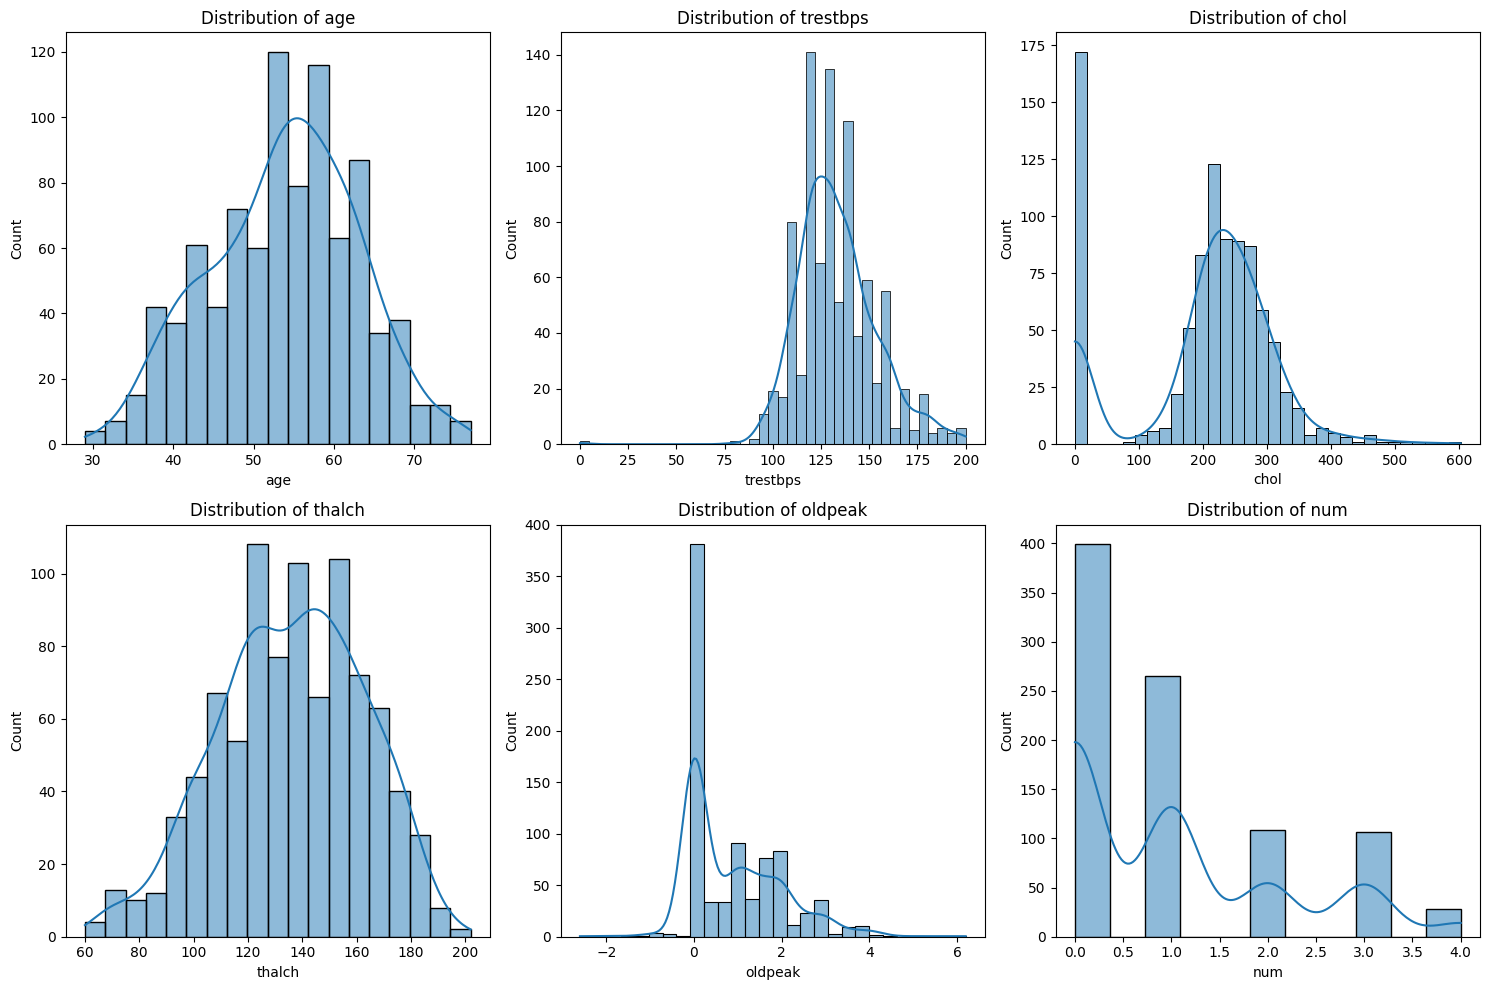

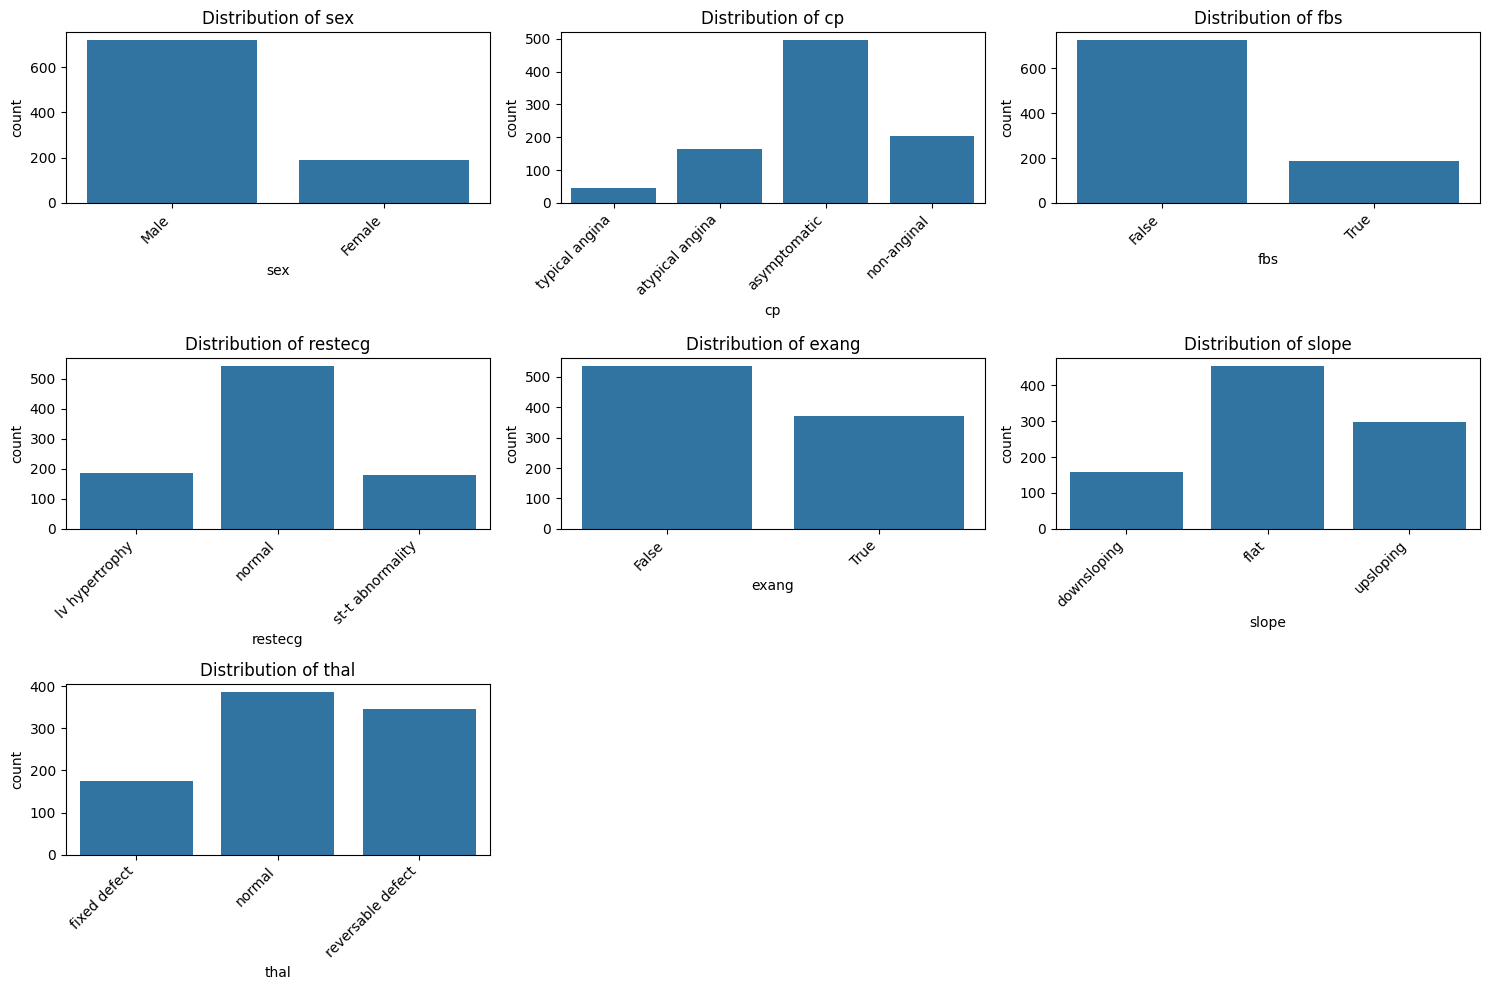

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Visualize numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical variables, and scale numerical features if necessary.


**Reasoning**:
Impute missing values, encode categorical features, and scale numerical features in the DataFrame.



In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Impute missing values in 'oldpeak' using the median
imputer = SimpleImputer(strategy='median')
df['oldpeak'] = imputer.fit_transform(df[['oldpeak']])

# Identify categorical and numerical columns for preprocessing
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Create preprocessing pipelines for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)])

# Apply preprocessing to the DataFrame
preprocessed_data = preprocessor.fit_transform(df)

# Convert the preprocessed data back to a DataFrame for easier handling (optional)
# Get the new column names after one-hot encoding
onehot_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_col_names = list(onehot_col_names) + numerical_cols

preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_col_names)

display(preprocessed_df.head())

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,...,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,age,trestbps,chol,thalch,oldpeak
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.006027,0.567394,0.281297,0.524183,1.354403
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-1.397560,0.076967,0.013526,-0.147705,-0.815718
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.350503,0.322181,-0.084656,0.449529,-0.438305
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-0.195767,-0.756760,-0.138211,2.017268,-0.815718
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.350503,-1.149102,-0.004325,-0.371668,0.599578


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the preprocessed data into training and testing sets and verify their shapes.



In [11]:
from sklearn.model_selection import train_test_split

X = preprocessed_df
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (681, 22)
Shape of X_test: (227, 22)
Shape of y_train: (681,)
Shape of y_test: (227,)


## Implement and train the decision tree model

### Subtask:
Build and train a Decision Tree Classifier on the training data.


**Reasoning**:
Build and train a Decision Tree Classifier on the training data.



In [12]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object with default parameters
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained model on the testing data using appropriate metrics.



In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.4317

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       100
           1       0.36      0.32      0.34        66
           2       0.10      0.11      0.11        27
           3       0.17      0.19      0.18        27
           4       0.00      0.00      0.00         7

    accuracy                           0.43       227
   macro avg       0.27      0.26      0.27       227
weighted avg       0.46      0.43      0.45       227


Confusion Matrix:
[[69 16  4  9  2]
 [16 21 13 11  5]
 [ 6  7  3  5  6]
 [ 3  9  8  5  2]
 [ 0  5  2  0  0]]


## Perform hyperparameter tuning

### Subtask:
Optimize the model's performance by tuning hyperparameters.


**Reasoning**:
Import necessary libraries and define the hyperparameter grid.



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**Reasoning**:
Instantiate and fit GridSearchCV to find the best hyperparameters and store the best model.



In [15]:
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_decision_tree_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy: 0.5521361099184199


## Model analysis and visualization

### Subtask:
Analyze the model's performance and visualize the decision tree structure.


**Reasoning**:
Evaluate the best model on the test set using accuracy, classification report, and confusion matrix, and then visualize the decision tree structure.



Accuracy Score (Best Model): 0.5286

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       100
           1       0.42      0.56      0.48        66
           2       0.29      0.15      0.20        27
           3       0.33      0.26      0.29        27
           4       0.00      0.00      0.00         7

    accuracy                           0.53       227
   macro avg       0.35      0.34      0.33       227
weighted avg       0.50      0.53      0.51       227


Confusion Matrix (Best Model):
[[72 21  1  6  0]
 [17 37  6  6  0]
 [ 8 15  4  0  0]
 [ 5 12  3  7  0]
 [ 1  4  0  2  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


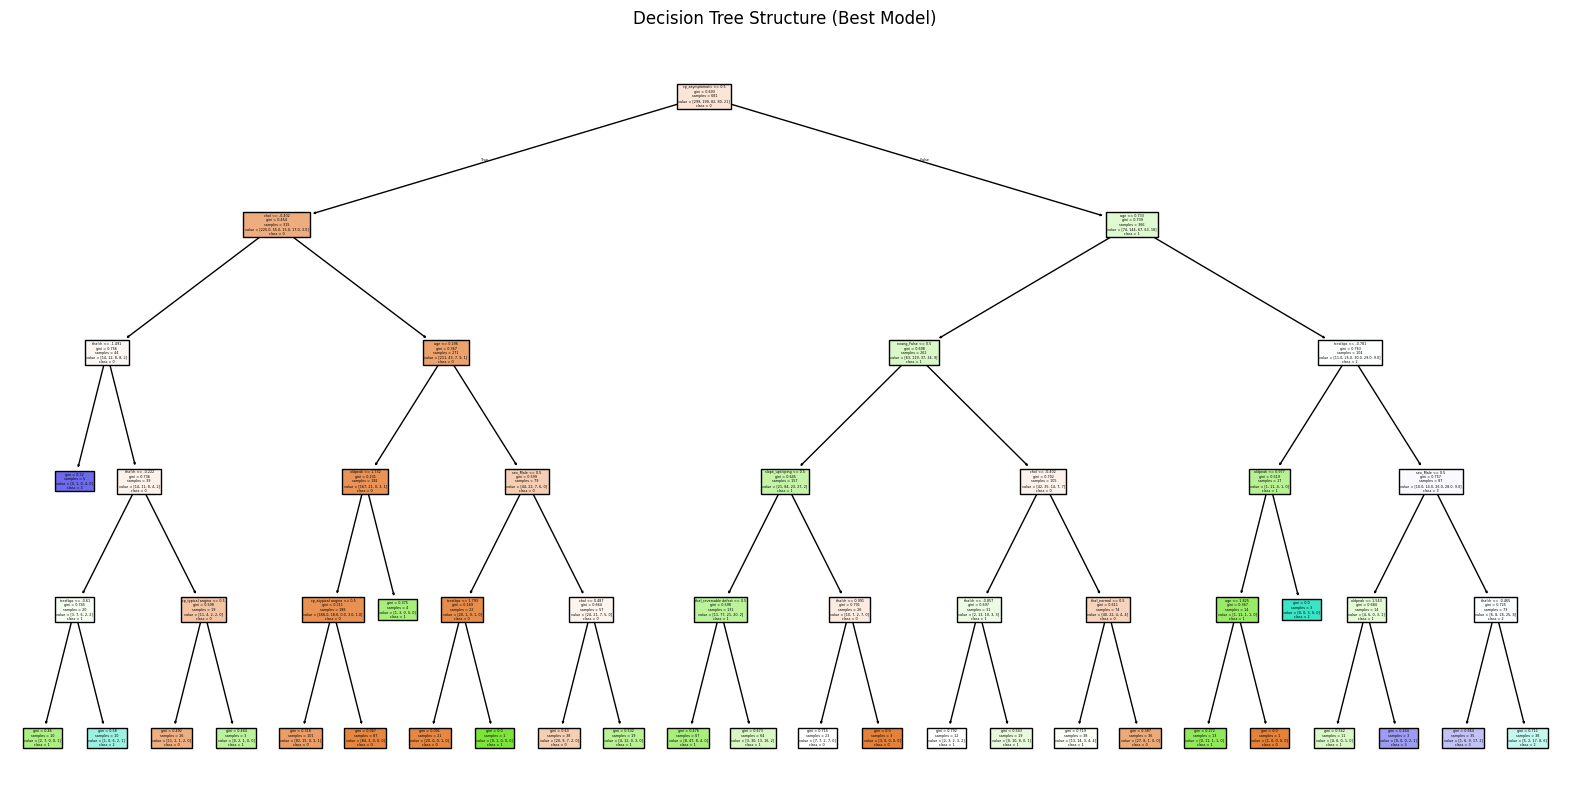

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Evaluate the best model on the test set
y_pred_best = best_decision_tree_model.predict(X_test)

# Calculate and print the accuracy score
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy Score (Best Model): {accuracy_best:.4f}")

# Print the classification report
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

# Print the confusion matrix
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))

# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree_model, filled=True, feature_names=X_train.columns.tolist(), class_names=[str(c) for c in sorted(y.unique())])
plt.title("Decision Tree Structure (Best Model)")
plt.show()

## Answer interview questions

### Subtask:
Address the interview questions about decision trees and encoding techniques.


**Reasoning**:
Provide explanations for the interview questions based on the previous steps performed in the notebook.



In [17]:
print("Interview Questions Answers:")
print("\n1. How a decision tree model works, its advantages and disadvantages:")
print("   Decision trees work by recursively partitioning the data based on the most significant features to create a tree-like structure of decisions. Each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a class label.")
print("   Advantages: Easy to understand and interpret, can handle both numerical and categorical data, requires little data preprocessing, and can capture non-linear relationships.")
print("   Disadvantages: Prone to overfitting, can be unstable to small variations in data, and can create biased trees if some classes dominate.")

print("\n2. Purpose of one-hot encoding and why it was applied:")
print("   One-hot encoding is a technique used to convert categorical variables into a numerical format that can be used by machine learning algorithms. It creates new binary columns for each unique category in the original feature. A '1' in a new column indicates the presence of that category, while a '0' indicates its absence.")
print("   It was applied because decision trees, like many other machine learning algorithms, require numerical input. One-hot encoding allows the model to incorporate the information from categorical features without assuming any ordinal relationship between categories.")

print("\n3. Potential issues with one-hot encoding on categorical features with a large number of unique values:")
print("   Using one-hot encoding on features with a high cardinality (many unique values) can lead to a significant increase in the number of columns in the dataset. This can result in several issues:")
print("   - Increased dimensionality: This can make the dataset sparse and increase the computational cost and memory requirements for training the model.")
print("   - Curse of dimensionality: In high-dimensional spaces, data points become sparse, making it difficult for models to find meaningful patterns.")
print("   - Multicollinearity: If categories are not mutually exclusive or have dependencies, it can introduce multicollinearity, which can affect model stability and interpretability.")

Interview Questions Answers:

1. How a decision tree model works, its advantages and disadvantages:
   Decision trees work by recursively partitioning the data based on the most significant features to create a tree-like structure of decisions. Each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a class label.
   Advantages: Easy to understand and interpret, can handle both numerical and categorical data, requires little data preprocessing, and can capture non-linear relationships.
   Disadvantages: Prone to overfitting, can be unstable to small variations in data, and can create biased trees if some classes dominate.

2. Purpose of one-hot encoding and why it was applied:
   One-hot encoding is a technique used to convert categorical variables into a numerical format that can be used by machine learning algorithms. It creates new binary columns for each unique category in the original feature. A '1' in a new c

## Summary:

### Data Analysis Key Findings

*   The dataset used for the analysis was "heart\_disease.xlsx", not the initially specified "drug200.csv".
*   The 'Heart\_disease' sheet within the Excel file contained the relevant data, consisting of 908 entries and 13 columns.
*   Missing values were identified in the 'oldpeak' column (62 missing values) and were imputed using the median.
*   Inconsistencies in categorical columns were handled, specifically correcting 'exang' values and removing rows with '?' in 'thal'.
*   Categorical features were one-hot encoded, and numerical features were standard scaled.
*   The dataset was split into training (75%) and testing (25%) sets, stratified by the target variable 'num'.
*   An initial Decision Tree Classifier achieved an accuracy of approximately 43.17% on the test set.
*   Hyperparameter tuning using GridSearchCV found the best hyperparameters to be `{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}`, resulting in a best cross-validation accuracy of approximately 55.21%.
*   The best Decision Tree model achieved an accuracy of approximately 52.86% on the test set.
*   The classification report and confusion matrix for the best model showed varying performance across different classes, with some classes having low precision and recall, indicating difficulty in classifying certain drug types.

### Insights or Next Steps

*   The model's performance is moderate, suggesting that further feature engineering or exploring more complex models might be beneficial to improve classification accuracy, especially for minority classes.
*   Investigating alternative encoding techniques for categorical features or exploring ensemble methods like Random Forests or Gradient Boosting could potentially lead to better performance.
